<a href="https://colab.research.google.com/github/Pakhi27/Spam-SMS-Collection-Naive-Bayes/blob/main/Spam_SMS_Collection_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SMS SPAM collection Dataset Analysis

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('spam.csv',encoding='latin-1')

In [33]:
dataset=pd.DataFrame(df)

In [34]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

<Axes: >

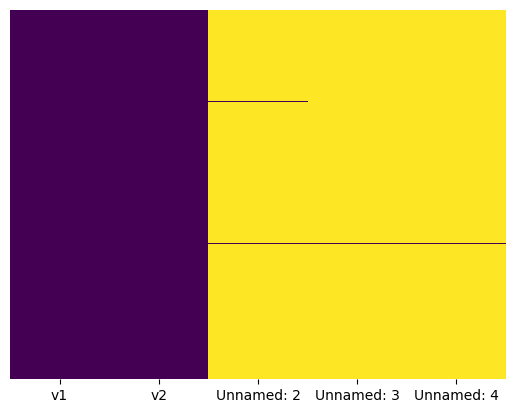

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
column_names=['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df.drop(column_names,axis=1,inplace=True)

In [ ]:
# Exploratory Data Analysis

In [ ]:
#missing values
#true means null or nan value

<Axes: >

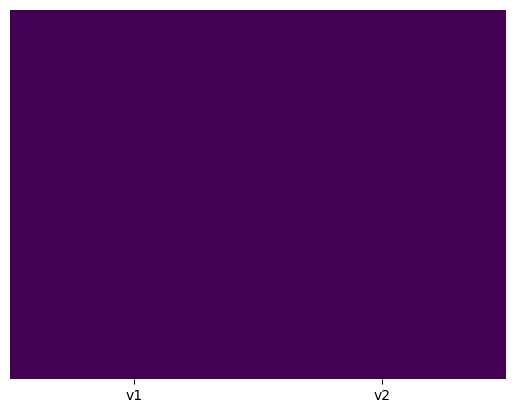

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

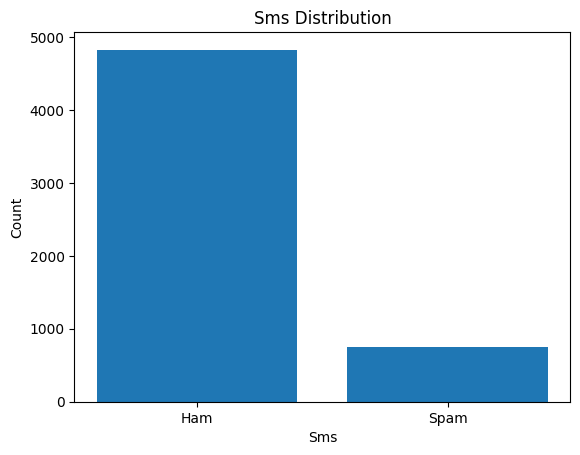

In [12]:
import matplotlib.pyplot as plt
sms_counts = [0, 0]

for sentiment in df['v1']:
  if sentiment == 'ham':
    sms_counts[0] += 1
  elif sentiment == 'spam':
    sms_counts[1] += 1

sms_labels = ["Ham", "Spam"]
sms_values = sms_counts

plt.bar(sms_labels, sms_values)
plt.xlabel("Sms")
plt.ylabel("Count")
plt.title("Sms Distribution")
plt.show()

In [13]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
# Preprocessing

In [14]:
# Convert to lower case
df['v2'] = df['v2'].apply(lambda x: x.lower())
df

,v1,v2
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [ ]:
# Removing stop words

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:

stop_words = stopwords.words('english')

def remove_stopwords(text):
  words = text.lower().split()  # Tokenize and lowercase
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

df['v2'] = df['v2'].apply(remove_stopwords)

In [ ]:
# Removing numbers

In [17]:
df.loc[:,'v2'] = df.loc[:,'v2'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'v2'] = df.loc[:,'v2'].str.strip()
df['v2']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                    pity  mood that soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [18]:
# Remove Special characters
df.loc[:,'v2'] = df.loc[:,'v2'].str.replace(r"[^\w\s]", '', regex=True)
df.loc[:,'v2'] = df.loc[:,'v2'].str.strip()
df['v2']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å750 pound prize ...
5568                         ì_ b going esplanade fr home
5569                    pity  mood that soany suggestions
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [19]:
# Removing Whitespaces
df['v2'] = df['v2'].apply(lambda text: text.strip())
df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u å750 pound prize ...
5568,ham,ì_ b going esplanade fr home
5569,ham,pity mood that soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [20]:
# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_features = vectorizer.fit_transform(df['v2'])
tfidf_features

<5572x9491 sparse matrix of type '<class 'numpy.float64'>'
	with 48705 stored elements in Compressed Sparse Row format>

In [30]:
tfidf_features

<5572x9491 sparse matrix of type '<class 'numpy.float64'>'
	with 48705 stored elements in Compressed Sparse Row format>

In [ ]:
# Building a Naive Bayes Classification Model

In [35]:
X=df.drop('v1',axis=1)
y=df['v1']


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(tfidf_features,y,test_size=0.30,random_state=101)

In [24]:
# Training and Predicting

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Find rows with the problematic string
problematic_rows = np.where(np.vectorize(lambda x: 'û_' in x)(X_train) == True)[0]

# Remove those rows from both X_train and y_train
X_train = np.delete(X_train, problematic_rows, axis=0)
y_train = np.delete(y_train, problematic_rows, axis=0)


In [27]:
df

,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u å750 pound prize ...
5568,ham,ì_ b going esplanade fr home
5569,ham,pity mood that soany suggestions
5570,ham,guy bitching acted like id interested buying s...


In [28]:
if 'v2' in df.columns:
    print("The 'v2' column exists in the DataFrame.")
else:
    print("The 'v2' column does not exist in the DataFrame.")

The 'v2' column exists in the DataFrame.


In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()
nb_classifier.fit(X_train,y_train)

MultinomialNB()

In [40]:
y_pred = nb_classifier.predict(X_test)
y_pred

array(['spam', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9665071770334929
Precision: 1.0
Recall: 0.7307692307692307
F1-score: 0.8444444444444443


In [ ]:
# Prediction with new Data

In [ ]:
new_sms=input("Enter a new sms: ")

new_sms_features = vectorizer.transform([new_sms])
new_sms_pred = nb_classifier.predict(new_sms_features)[0]

if new_sms_pred == "ham":
  print("New sms is classified as ham")
else:
  print("New sms is classified as spam")

